# Tempora - Climate Analysis 

Himesh Dulal (20), Avipsa Parajuli (37), Aayusha Shrestha (50), Pratistha Thapa (57), Abhinav Lamsal (68)

## <b>Summary </b>
The project uses numerical methods like Interpolation, Linear Regression, Polynomial Fit + Extrapolation and Newton Raphson Method for analysis and predicting the climate data of data set provided as per csv.

## 1. Loading the CSV Data

In [ ]:
# Import required libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Kathmandu data as an example
df = pd.read_csv('data/final_data/Kathmandu.csv')
df = df.sort_values(['Year', 'Month']).reset_index(drop=True)

In [ ]:
import pandas as pd

def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath)
    df = df.sort_values(['Year', 'Month']).reset_index(drop=True)
    return df

In [9]:
def linear_interpolate_series(series):
    result = series.copy()
    for i in range(len(series)):
        if pd.isna(series[i]):
            # Find previous known value
            prev_index = i - 1
            while prev_index >= 0 and pd.isna(series[prev_index]):
                prev_index -= 1

            # Find next known value
            next_index = i + 1
            while next_index < len(series) and pd.isna(series[next_index]):
                next_index += 1

            if prev_index >= 0 and next_index < len(series):
                # Perform linear interpolation
                x0, y0 = prev_index, series[prev_index]
                x1, y1 = next_index, series[next_index]
                x = i
                result[i] = y0 + (x - x0) * (y1 - y0) / (x1 - x0)

    return result

In [ ]:
def clean_data(df):
    print("Data with Missing Values:")
    print(df[['Year', 'Month', 'Temp_2m', 'Precip']][df['Temp_2m'].isna() | df['Precip'].isna()])

    cleaned_df = df.copy()

    cleaned_df['Temp_2m'] = linear_interpolate_series(cleaned_df['Temp_2m'])
    cleaned_df['Precip'] = linear_interpolate_series(cleaned_df['Precip'])

    print("\n After Cleaning:")
    print(cleaned_df[['Year', 'Month', 'Temp_2m', 'Precip']])

    # Plot before vs after
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(df['Temp_2m'], label='Original Temp')
    plt.plot(cleaned_df['Temp_2m'], label='Cleaned Temp', linestyle='--')
    plt.title('Temperature - Be vs After Interpolation')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(df['Precip'], label='Original Rain')
    plt.plot(cleaned_df['Precip'], label='Cleaned Rain', linestyle='--')
    plt.title('Rainfall - Before vs After Interpolation')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return cleaned_df

In [17]:
cleaned_df = clean_data(df)

Data with Missing Values:
     Year  Month    Temp_2m  Precip
2    2000      3  14.473226     NaN
6    2000      7        NaN  139.33
9    2000     10        NaN     NaN
15   2001      4        NaN    6.09
24   2002      1        NaN   12.10
30   2002      7        NaN     NaN
55   2004      8        NaN     NaN
58   2004     11  11.911667     NaN
73   2006      2  13.719286     NaN
77   2006      6  21.040000     NaN
80   2006      9  19.235000     NaN
88   2007      5  21.738710     NaN
91   2007      8  20.660323     NaN
93   2007     10  16.804839     NaN
112  2009      6        NaN  107.11
113  2009      7        NaN  219.02
115  2009      9        NaN   54.11
120  2010      2  11.110714     NaN
125  2010      7  21.698387     NaN
126  2010      8        NaN  341.30
129  2010     11  13.663333     NaN
137  2011      7        NaN  287.51
156  2013      3  15.580000     NaN
170  2014      6        NaN  235.00
172  2014      8  20.816774     NaN
182  2015      6        NaN  170.67
19

AttributeError: module 'matplotlib' has no attribute 'figure'

In [18]:
def visualize_trends(df):
    # Group by year
    yearly_df = df.groupby('Year').agg({
        'Temp_2m': 'mean',
        'Precip': 'sum'
    }).reset_index()

    plt.figure(figsize=(10, 5))

    plt.plot(yearly_df['Year'], yearly_df['Temp_2m'], color='orange', marker='o', label='Avg Temp (°C)')
    plt.plot(yearly_df['Year'], yearly_df['Precip'], color='blue', marker='s', label='Total Rainfall (mm)')

    plt.title('Climate Trends in Kathmandu (2000–2019)')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [35]:
visualize_trends(cleaned_df)

NameError: name 'visualize_trends' is not defined

In [36]:
def compare_trends_by_year(df_original, df_cleaned):
    # Group both datasets by year
    yearly_orig = df_original.groupby('Year').agg({
        'Temp_2m': 'mean',
        'Precip': 'sum'
    }).reset_index()

    yearly_cleaned = df_cleaned.groupby('Year').agg({
        'Temp_2m': 'mean',
        'Precip': 'sum'
    }).reset_index()

    # Plot comparison
    plt.figure(figsize=(12, 6))

    # Temperature
    plt.subplot(1, 2, 1)
    plt.plot(yearly_orig['Year'], yearly_orig['Temp_2m'], label='Original Avg Temp', color='orange', marker='x')
    plt.plot(yearly_cleaned['Year'], yearly_cleaned['Temp_2m'], label='Interpolated Avg Temp', color='green', linestyle='--', marker='o')
    plt.title('Yearly Avg Temperature (2000–2019)')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)

    # Rainfall
    plt.subplot(1, 2, 2)
    plt.plot(yearly_orig['Year'], yearly_orig['Precip'], label='Original Rainfall', color='blue', marker='x')
    plt.plot(yearly_cleaned['Year'], yearly_cleaned['Precip'], label='Interpolated Rainfall', color='purple', linestyle='--', marker='o')
    plt.title('Yearly Rainfall Totals (2000–2019)')
    plt.xlabel('Year')
    plt.ylabel('Rainfall (mm)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [15]:
compare_trends_by_year(df, cleaned_df)

NameError: name 'df' is not defined

In [37]:
#defining regression function
def fit_polynomial_manual(x, y, degree):
    X = np.vander(x, degree + 1, increasing=True)
    return np.linalg.inv(X.T @ X) @ X.T @ y


df_reg = cleaned_df[['Year', 'Month', 'Temp_2m', 'Precip']].dropna().copy() #selecting only the relevent column
df_reg['TimeIndex'] = (df_reg['Year'] - df_reg['Year'].min()) * 12 + df_reg['Month'] #Creates a continuous month-wise index 

NameError: name 'cleaned_df' is not defined

In [38]:
# Polynomial regression, add seasonality, and plot forecast
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Fit polynomial regression (example: Temp_2m)
feature = 'Temp_2m'  # or 'Precip' for rainfall
degree = 2  # You can change the degree as needed
district_name = 'Kathmandu'  # Change as needed

x = df_reg['TimeIndex'].values
y = df_reg[feature].values
coeffs = fit_polynomial_manual(x, y, degree)
trend_future = np.vander(x, degree + 1, increasing=True) @ coeffs

# Add seasonality back
month_avg = df_reg.groupby('Month')[feature].mean()
future_months = pd.Series(df_reg['Month'].values, index=df_reg.index)
seasonal_offsets = future_months.map(month_avg)
y_forecast = trend_future + seasonal_offsets.values

# Plotting graph of the interpolation and forecast
actual_labels = df_reg['TimeIndex']
future_labels = df_reg['TimeIndex']  # Here, using same index for demonstration

plt.figure(figsize=(14, 5))
plt.plot(actual_labels, y, label='Actual')
plt.plot(future_labels, y_forecast, label='Forecast + Seasonality', linestyle='--')

plt.title(f"{district_name} {feature} Forecast with Seasonality")
plt.xlabel("Time (Year-Month Index)")
plt.ylabel(feature)
plt.legend()
plt.show()

NameError: name 'df_reg' is not defined

In [33]:
# Crop recommendation based on average temperature and precipitation

def recommend_crop(avg_temp, avg_precip):
    """
    Simple rule-based crop recommendation.
    You can expand this dictionary as needed for your region.
    """
    crop_table = [
        {"crop": "Rice", "temp_range": (20, 30), "precip_range": (150, 300)},
        {"crop": "Maize", "temp_range": (18, 27), "precip_range": (50, 150)},
        {"crop": "Wheat", "temp_range": (10, 25), "precip_range": (30, 100)},
        {"crop": "Millet", "temp_range": (18, 32), "precip_range": (50, 150)},
        {"crop": "Barley", "temp_range": (12, 25), "precip_range": (20, 80)},
        {"crop": "Mustard", "temp_range": (10, 25), "precip_range": (20, 60)},
        {"crop": "Potato", "temp_range": (15, 20), "precip_range": (50, 120)},
    ]
    recommendations = []
    for entry in crop_table:
        tmin, tmax = entry["temp_range"]
        pmin, pmax = entry["precip_range"]
        if tmin <= avg_temp <= tmax and pmin <= avg_precip <= pmax:
            recommendations.append(entry["crop"])
    return recommendations if recommendations else ["No suitable crop found"]

# Calculate average temperature and precipitation for the data
district_avg_temp = df['Temp_2m'].mean()
district_avg_precip = df['Precip'].mean()

recommended_crops = recommend_crop(district_avg_temp, district_avg_precip)
print(f"Average Temp: {district_avg_temp:.2f}°C, Average Precip: {district_avg_precip:.2f} mm")
print("Recommended crops for this climate:", ", ".join(recommended_crops))

Average Temp: 16.45°C, Average Precip: 86.37 mm
Recommended crops for this climate: Wheat, Potato


Matplotlib is building the font cache; this may take a moment.


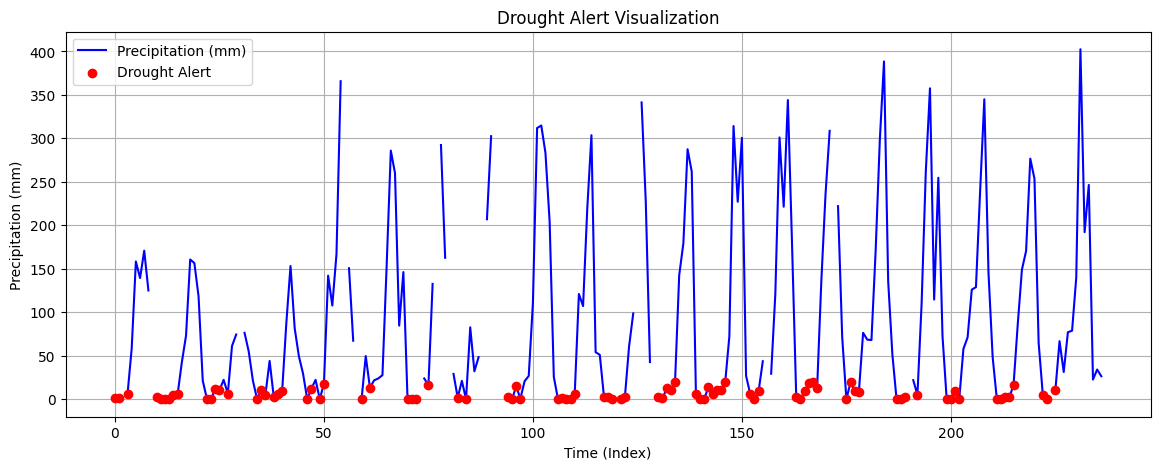

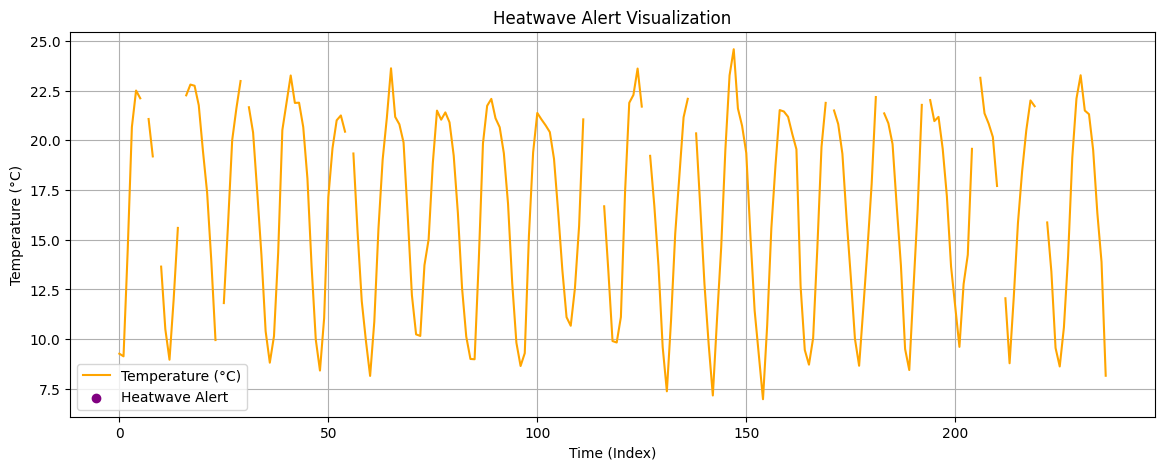

Drought months (Precip < 20 mm): [[2.000e+03 1.000e+00 8.900e-01]
 [2.000e+03 2.000e+00 1.360e+00]
 [2.000e+03 4.000e+00 5.750e+00]
 [2.000e+03 1.100e+01 2.500e+00]
 [2.000e+03 1.200e+01 2.000e-02]
 [2.001e+03 1.000e+00 3.000e-01]
 [2.001e+03 2.000e+00 1.300e-01]
 [2.001e+03 3.000e+00 5.020e+00]
 [2.001e+03 4.000e+00 6.090e+00]
 [2.001e+03 1.100e+01 2.700e-01]
 [2.001e+03 1.200e+01 0.000e+00]
 [2.002e+03 1.000e+00 1.210e+01]
 [2.002e+03 2.000e+00 1.043e+01]
 [2.002e+03 4.000e+00 6.500e+00]
 [2.002e+03 1.100e+01 1.000e-01]
 [2.002e+03 1.200e+01 1.069e+01]
 [2.003e+03 1.000e+00 5.320e+00]
 [2.003e+03 3.000e+00 2.370e+00]
 [2.003e+03 4.000e+00 6.330e+00]
 [2.003e+03 5.000e+00 9.130e+00]
 [2.003e+03 1.100e+01 3.000e-02]
 [2.003e+03 1.200e+01 1.231e+01]
 [2.004e+03 2.000e+00 7.000e-02]
 [2.004e+03 3.000e+00 1.793e+01]
 [2.004e+03 1.200e+01 5.000e-02]
 [2.005e+03 2.000e+00 1.336e+01]
 [2.005e+03 1.100e+01 0.000e+00]
 [2.005e+03 1.200e+01 3.000e-02]
 [2.006e+03 1.000e+00 0.000e+00]
 [2.006e+0

In [32]:
# Drought and Heatwave Alert Visualization

import matplotlib.pyplot as plt

# Define thresholds (can be adjusted as needed)
drought_precip_threshold = 20  # mm (monthly precipitation below this is considered drought)
heatwave_temp_threshold = 32   # °C (monthly average temperature above this is considered heatwave)

# Identify drought and heatwave months
drought_months = df[(df['Precip'] < drought_precip_threshold)]
heatwave_months = df[(df['Temp_2m'] > heatwave_temp_threshold)]

plt.figure(figsize=(14, 5))
plt.plot(df['TimeIndex'] if 'TimeIndex' in df.columns else range(len(df)), df['Precip'], label='Precipitation (mm)', color='blue')
plt.scatter(drought_months['TimeIndex'] if 'TimeIndex' in drought_months.columns else drought_months.index, drought_months['Precip'], color='red', label='Drought Alert', zorder=5)
plt.ylabel('Precipitation (mm)')
plt.xlabel('Time (Index)')
plt.title('Drought Alert Visualization')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(df['TimeIndex'] if 'TimeIndex' in df.columns else range(len(df)), df['Temp_2m'], label='Temperature (°C)', color='orange')
plt.scatter(heatwave_months['TimeIndex'] if 'TimeIndex' in heatwave_months.columns else heatwave_months.index, heatwave_months['Temp_2m'], color='purple', label='Heatwave Alert', zorder=5)
plt.ylabel('Temperature (°C)')
plt.xlabel('Time (Index)')
plt.title('Heatwave Alert Visualization')
plt.legend()
plt.grid(True)
plt.show()

print(f"Drought months (Precip < {drought_precip_threshold} mm):", drought_months[['Year', 'Month', 'Precip']].values)
print(f"Heatwave months (Temp_2m > {heatwave_temp_threshold} °C):", heatwave_months[['Year', 'Month', 'Temp_2m']].values)